## Lab 2 Template

zID: z5212833

Name: Yueying LI

Below we provide sample code for the SIFT detector using SIFT_create() function from opencv_contrib package

In [1]:
import math
import numpy as np
import sys

import cv2
import matplotlib.pyplot as plt

In [2]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

In [3]:
# Function to rotate an input image
# parameters:
            # image: image to rotate
            # x: x-coordinate of point we wish to rotate around
            # y: y-coordinate of point we wish to rotate around
            # angle: degrees to rotate image by
# returns: rotated copy of the original image

def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

In [4]:
# Function to get coordinates of center point in an image
# parameter:
            # image: image that will be rotated
# returns: (x,y) coordinates of point at the centre of an image

def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2
    return center

## Task 1: Read the given sample image "Beehive_Corner_Adelaide.png" and compute the SIFT features of the given image.
- Extract SIFT features with default parameters and show the keypoints on the image.
- To achieve better visualization of the keypoints, reduce the number of keypoints. Hint: Vary the parameter contrastThreshold or nfeatures so that the number of keypoints becomes about 10% of all default keypoints.

Default SIFT features:  8383
Less SIFT features:  838


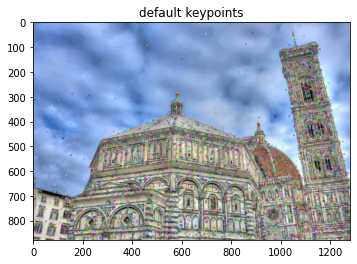

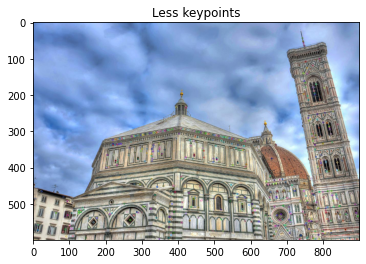

In [78]:
# Write your code here and display original image and images obtained in 1(a) and 1(b)
image = cv2.imread('Cathedral.png')

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sift = SiftDetector(params=None)

keypoint,des = sift.detector.detectAndCompute(image_gray, None)
keypoint_gray = cv2.drawKeypoints(image, keypoint, image_gray)
keypoint_gray = cv2.cvtColor(keypoint_gray, cv2.COLOR_BGR2RGB)

print("Default SIFT features: ", len(keypoint))
plt.figure(1)
plt.title("default keypoints")
keypoint_gray = cv2.resize(keypoint_gray, (900, 600), interpolation=cv2.INTER_CUBIC)
plt.imsave('1(a)_all.png',keypoint_gray)
plt.imshow(keypoint_gray)

# Less Feature Parameters for SIFT 10% keypoints
params_less = {
    'n_features': 838,    
    'n_octave_layers': 3,
    'contrast_threshold': 0.03, 
    'edge_threshold': 10,
    'sigma': 1.6
}

sift = SiftDetector(params=params_less)

less,des1 = sift.detector.detectAndCompute(grayImageOrig, None)
gray_less = cv2.drawKeypoints(image, less, image_gray)
gray_less = cv2.cvtColor(gray_less, cv2.COLOR_BGR2RGB)

print("Less SIFT features: ", len(kp_less))
plt.figure(2)
plt.title("Less keypoints")
gray_less = cv2.resize(gray_less, (900, 600), interpolation=cv2.INTER_CUBIC)
plt.imsave('1(b)_less.png',gray_less)
plt.imshow(gray_less)
plt.show()


For 1(b) I change n_features to 838 to filter out weak features and remain about 10% of originals.

## Task 2: Change the scale of the image and recompute the SIFT features.
- Enlarge the given image by a scale percentage of 120.
- Extract the SIFT features and show the keypoints on the scaled image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the scaled image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the scaled image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the scaled image. Hint: Brute-force matching is available in OpenCV for feature matching.


Upscaled SIFT features:  838


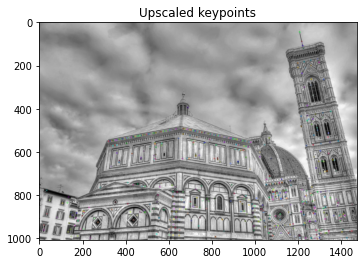

Matched SIFT features:  428


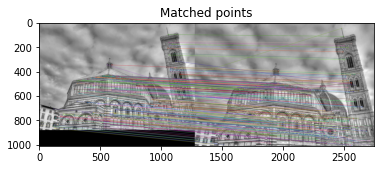

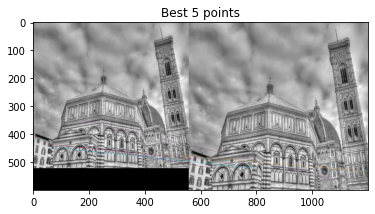

In [75]:
# Write your code here and display images obtained in 2(b) and 2(d). Also, write your answer to 2(c) in a new cell.
width = int(image.shape[1] * 115 / 100)
height = int(image.shape[0] * 115 / 100)
dim = (width, height)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
big_img = cv2.resize(image_gray, dim, interpolation=cv2.INTER_AREA)


kp_up,des2 = sift.detector.detectAndCompute(big_img, None)
kp_gray_up = cv2.drawKeypoints(big_img, kp_up, big_img)
#kp_gray_up = cv2.cvtColor(kp_gray_up, cv2.COLOR_BGR2RGB)

print("Upscaled SIFT features: ", len(kp_up))
plt.figure(1)
plt.title("Upscaled keypoints")
plt.imsave("larger_kp.png",kp_gray_up)
plt.imshow(kp_gray_up)
plt.show()

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.80 * n.distance:
        good.append([m])
print("Matched SIFT features: ",len(good))

# Draw matches
result = cv2.drawMatchesKnn(
    image_gray, less,
    big_img, kp_up,
    good, None, flags=2)

plt.figure(2)
plt.title("Matched points")
plt.imsave('upscaled_all.png',result)
plt.imshow(result)
plt.show()

# show best 5 keypoints
distance = []
for ind, kp in enumerate(good):
    distance.append((kp[0].distance,ind))
    distance.sort(reverse=True)

best = []
for i in range(5):
    best.append(good[distance[i][1]])
    
result_best = cv2.drawMatchesKnn(
    image_gray, less,
    big_img, kp_up,
    best, None, flags=2)

plt.figure(3)
plt.title("Best 5 points")
result_best = cv2.resize(result_best, (1200, 600), interpolation=cv2.INTER_CUBIC)
plt.imsave('upscaled_best.png',result_best)
plt.imshow(result_best)
plt.show()

The keypoints of the scaled image is roughly the same as those of the original image.
This observation implies that the scale of image will not change the keypoints.

## Task 3: Rotate the image and recompute the SIFT features.
- Rotate the given image anticlockwise by 60 degrees.
- Extract the SIFT features and show the keypoints on the rotated image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the rotated image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the rotated image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the rotated image.

Number of rotated SIFT features:  838


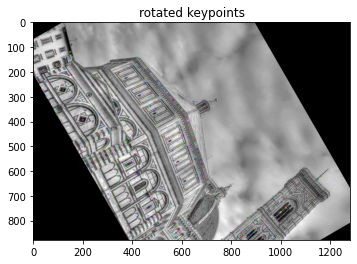

Matched SIFT features:  410


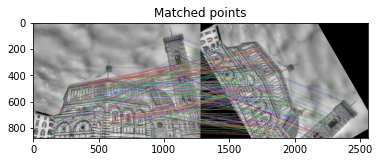

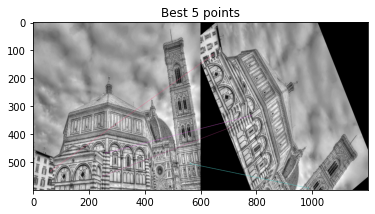

In [76]:
# Write your code here and display images obtained in 3(b) and 3(d). Also, write your answer to 3(c) in a new cell.
# center of image points. 'img_center' is in (Y, X) order.
img_center = get_img_center(image_gray)
x_coord = img_center[1]
y_coord = img_center[0]

# Degrees with which to rotate image
angle1 = -60
angle2 = -120

# Rotate image
rotate_gray = rotate(image_gray, x_coord, y_coord, angle1)
#rotate60= cv2.cvtColor(rotate_gray, cv2.COLOR_BGR2RGB)
# Compute SIFT features for rotated image1
kp_rotate, des3 = sift.detector.detectAndCompute(rotate_gray, None)
kp_gray_rotate = cv2.drawKeypoints(rotate_gray, kp_rotate, None)

print("Number of rotated SIFT features: ", len(kp_rotate))
plt.figure(1)
plt.title("rotated keypoints")
plt.imshow(kp_gray_rotate)
plt.show()


# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des3, k=2)

good = []
for m, n in matches:
    if m.distance < 0.80 * n.distance:
        good.append([m])
print("Matched SIFT features: ",len(good))

# cv2.drawMatchesKnn
result = cv2.drawMatchesKnn(
    image_gray, less,
    rotate_gray, kp_rotate,
    good, None, flags=2)

plt.figure(2)
plt.title("Matched points")
plt.imsave("rotate60_all.png",result)
plt.imshow(result)
plt.show()

# show best 5 keypoints
distance = []
for ind, kp in enumerate(good):
    distance.append((kp[0].distance,ind))
    distance.sort(reverse=True)

best = []
for i in range(5):
    best.append(good[distance[i][1]])
    
result_best = cv2.drawMatchesKnn(
    image_gray, less,
    rotate_gray, kp_rotate,
    best, None, flags=2)

plt.figure(3)
plt.title("Best 5 points")
result_best = cv2.resize(result_best, (1200, 600), interpolation=cv2.INTER_CUBIC)
plt.imsave('rotate60_best.png',result_best)
plt.imshow(result_best)
plt.show()

Number of rotated SIFT features:  838


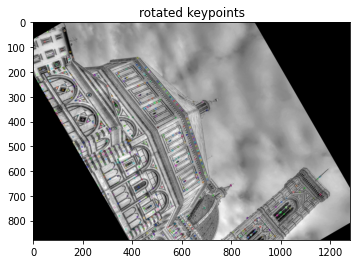

Matched SIFT features:  410


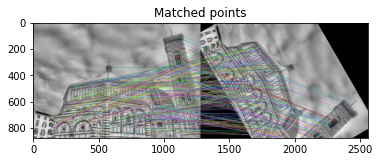

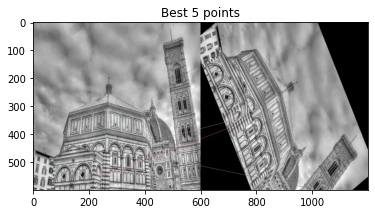

In [77]:
# Rotate image
rotate120 = rotate(image_gray, x_coord, y_coord, angle1)
#rotate120= cv2.cvtColor(rotate120, cv2.COLOR_BGR2RGB)
# Compute SIFT features for rotated image1
kp120, des3 = sift.detector.detectAndCompute(rotate120, None)
kp_rotate_120 = cv2.drawKeypoints(rotate120, kp120, None)

print("Number of rotated SIFT features: ", len(kp120))
plt.figure(1)
plt.title("rotated keypoints")
plt.imshow(kp_rotate_120)
plt.show()


# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des3, k=2)

good = []
for m, n in matches:
    if m.distance < 0.80 * n.distance:
        good.append([m])
print("Matched SIFT features: ",len(good))

# cv2.drawMatchesKnn
result = cv2.drawMatchesKnn(
    image_gray, less,
    rotate120, kp120,
    good, None, flags=2)

plt.figure(2)
plt.title("Matched points")
plt.imsave("rotate120_all.png",result)
plt.imshow(result)
plt.show()

# show best 5 keypoints
distance = []
for ind, kp in enumerate(good):
    distance.append((kp[0].distance,ind))
    distance.sort(reverse=True)

best = []
for i in range(5):
    best.append(good[distance[i][1]])
    
result_best = cv2.drawMatchesKnn(
    image_gray, less,
    rotate120, kp120,
    best, None, flags=2)

plt.figure(3)
plt.title("Best 5 points")
result_best = cv2.resize(result_best, (1200, 600), interpolation=cv2.INTER_CUBIC)
plt.imsave("rotate120_best.png",result_best)
plt.imshow(result_best)
plt.show()

The keypoints of the scaled image is roughly the same as those of the original image.
This observation implies that the scale of image will not change the keypoints.